<h2 align="center"> Logistic Regression </h2>

### Machine Learning - Stanford - Andrew Ng (Python Implementation)
---

### Load the Data and Libraries
---

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [13]:
df=pd.read_csv("ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [14]:
df.info

<bound method DataFrame.info of             0          1  2
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]>

In [15]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting the Data
---

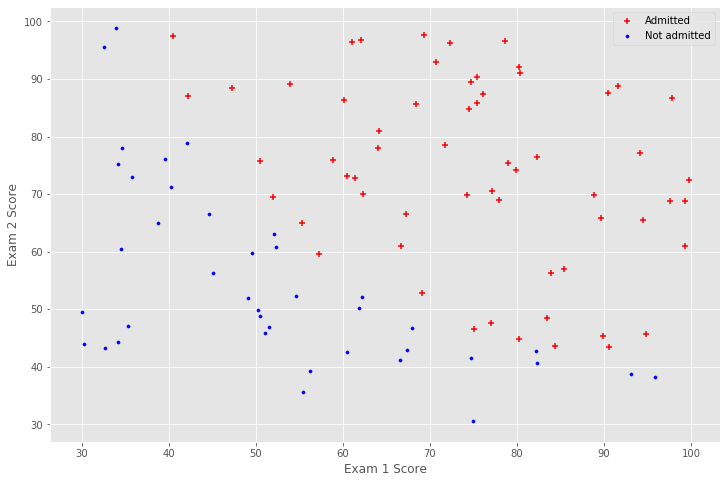

In [16]:
positive , negative = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[positive[:,0],0],X[positive[:,0],1],c="r",marker="+")
plt.scatter(X[negative[:,0],0],X[negative[:,0],1],marker="o",s=10, c='b')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Admitted","Not admitted"],loc=0);

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [17]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [18]:
# Testing the Sigmoid Function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient


$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$


$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$



In [63]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature Scaling

In [64]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [65]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [66]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [67]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [68]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting the Cost Function

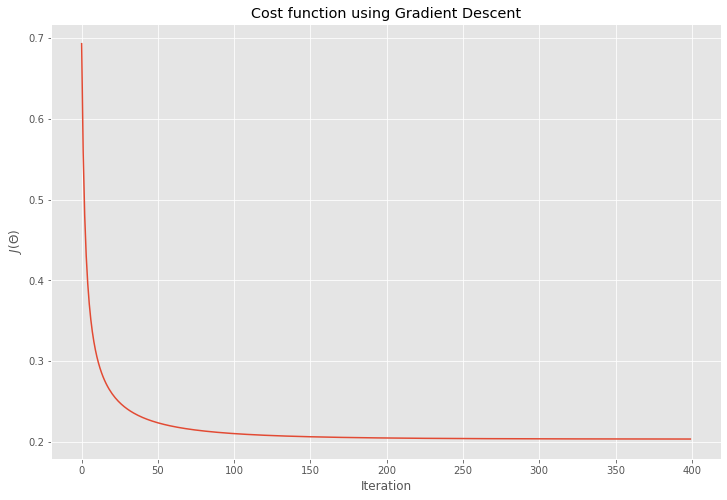

In [69]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent");

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

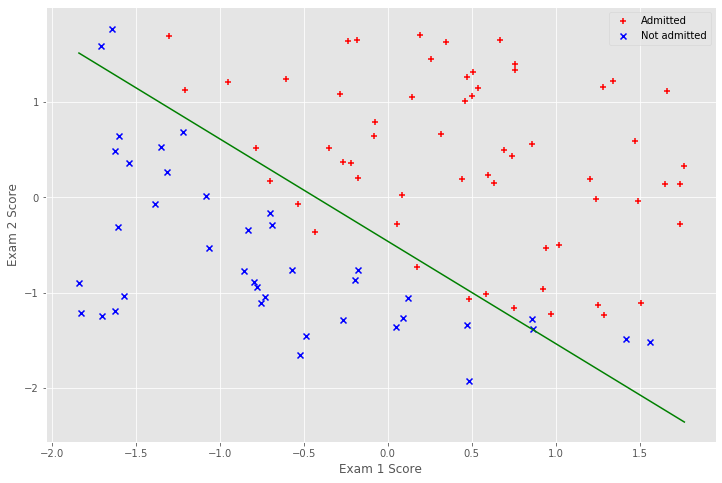

In [71]:
plt.scatter(X[positive[:,0],1],X[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[negative[:,0],1],X[negative[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc=0);

### Prediction

In [72]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [73]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


### Accuracy on Training Set

In [74]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
